C:\Users\Krika\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


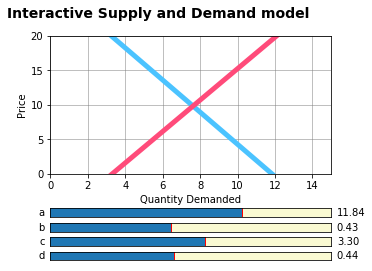

In [1]:
from numpy import pi, sin
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display


def demand(a,b):
    qd = a-b*p
    return qd

axis_color = 'lightgoldenrodyellow'


fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle('Interactive Supply and Demand model', fontsize=14, fontweight='bold')
# Adjust the subplots region to leave some space for the sliders and buttons
fig.subplots_adjust(left=0.25, bottom=0.40)

p = np.arange(-30, 30)
a=11.84
b=0.43

# Draw the initial plot
# The 'line' variable is used for modifying the line later
[line] = ax.plot(demand(a, b), p ,  linewidth=5, color='#4bc3ff',label='Demmand Curve')
ax.set_xlim([0, 15])
ax.set_ylim([0, 20])

# Define an axes area and draw a slider in it
a_slider_ax  = fig.add_axes([0.25, 0.25, 0.65, 0.03], axisbg=axis_color)
a_slider = Slider(a_slider_ax, 'a', 5, 15.0, valinit=a)

# Draw another slider
b_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], axisbg=axis_color)
b_slider = Slider(b_slider_ax, 'b', 0.0, 1.0, valinit=b)

# Define an action for modifying the line when any slider's value changes
def sliders_on_changed(val):
    line.set_xdata(demand(a_slider.val, b_slider.val))
    fig.canvas.draw_idle()
a_slider.on_changed(sliders_on_changed)
b_slider.on_changed(sliders_on_changed)

def supply(c,d):
    qs = c+d*p
    return qs

axis_color = 'lightgoldenrodyellow'

# Adjust the subplots region to leave some space for the sliders and buttons

c=3.3
d=0.44

# Draw the initial plot
# The 'line' variable is used for modifying the line later
[line2] = ax.plot(supply(c, d), p, linewidth=5, color='#ff4b7a',label='Supply Curve')

# Define an axes area and draw a slider in it
c_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], axisbg=axis_color)
c_slider = Slider(c_slider_ax, 'c', 0, 6, valinit=c)

# Draw another slider
d_slider_ax = fig.add_axes([0.25, 0.10, 0.65, 0.03], axisbg=axis_color)
d_slider = Slider(d_slider_ax, 'd', 0.0, 1.0, valinit=d)

# Define an action for modifying the line when any slider's value changes

def sliders_on_changed2(val):
    line2.set_xdata(supply(c_slider.val, d_slider.val))
    fig.canvas.draw_idle()
    
c_slider.on_changed(sliders_on_changed2)
d_slider.on_changed(sliders_on_changed2)

ax.set_xlabel("Quantity Demanded")
ax.set_ylabel("Price")
ax.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()
